# Working with `auxi`'s Slag Physical Property Models

## Purpose
The purpose of this example is to introduce and demonstrate the `slags` model classes in `auxi`'s material physical property tools package.

## Background
The `slags` models provides you with the tools to calculate physical property values of liquid slags as a function of temperature and composition. The module currently contains only viscosity models, specifically those developed by Riboud and Urbain.

## Items Covered
The following items in `auxi` are discussed and demonstrated in this example:
* `auxi.tools.materialphysicalproperties.slags.UrbainViscosityTx`
* `auxi.tools.materialphysicalproperties.slags.UrbainViscosityTy`
* `auxi.tools.materialphysicalproperties.slags.RiboudViscosityTx`
* `auxi.tools.materialphysicalproperties.slags.RiboudViscosityTy`

## Example Scope
In this example we will address the following aspects:
1. Using the `UrbainViscosityTx` model
2. Using the `UrbainViscosityTy` model
3. Using the `RiboudViscosityTx` model
4. Using the `RiboudViscosityTy` model
5. Comparing results from these models with experimental data

## Demonstrations

### Using the `UrbainViscosityTx` Model
This model calculates viscosity from temperature and composition expressed as __mole fractions__.

In [13]:
from auxi.tools.materialphysicalproperties.slags import UrbainViscosityTx

# create an instance of the model
urbainTx = UrbainViscosityTx()

# define the material state
T = 1873.15  # K
x = {'SiO2': 0.25, 'P2O5': 0.25, 'CaO': 0.25, 'MgO':0.25}

# calculate the viscosity
mu = urbainTx(T=T, x=x)
print(urbainTx.symbol, mu, urbainTx.units)

mu 0.26882140687000605 Pa.s


### Using the `UrbainViscosityTx` Model
This model calculates viscosity from temperature and composition expressed as __mass fractions__.

In [14]:
from auxi.tools.materialphysicalproperties.slags import UrbainViscosityTy

# create an instance of the model
urbainTy = UrbainViscosityTy()

# define the material state
T = 1873.15  # K
y = {'SiO2': 0.25, 'P2O5': 0.25, 'CaO': 0.25, 'MgO':0.25}

# calculate the viscosity
mu = urbainTy(T=T, y=y)
print(urbainTy.symbol, mu, urbainTy.units)

mu 0.139674760536543 Pa.s


### Using the `RiboudViscosityTx` Model
This model calculates viscosity from temperature and composition expressed as __mole fractions__.

In [15]:
from auxi.tools.materialphysicalproperties.slags import RiboudViscosityTx

# create an instance of the model
riboudTx = RiboudViscosityTx()

# define the material state
T = 1873.15  # K
x = {'SiO2': 0.25, 'P2O5': 0.25, 'CaO': 0.25, 'MgO':0.25}

# calculate the viscosity
mu = riboudTx(T=T, x=x)
print(riboudTx.symbol, mu, riboudTx.units)

mu 0.938329879600689 Pa.s


### Using the `RiboudViscosityTx` Model
This model calculates viscosity from temperature and composition expressed as __mass fractions__.

In [16]:
from auxi.tools.materialphysicalproperties.slags import RiboudViscosityTy

# create an instance of the model
riboudTy = RiboudViscosityTy()

# define the material state
T = 1873.15  # K
y = {'SiO2': 0.25, 'P2O5': 0.25, 'CaO': 0.25, 'MgO':0.25}

# calculate the viscosity
mu = riboudTy(T=T, y=y)
print(riboudTy.symbol, mu, riboudTy.units)

mu 0.12728652906349372 Pa.s


### Comparing with Experimental Data
Let's compare the calculation results of the Urbain and Riboud models with experimental results from literature. First, let's import a data set, and see what it looks like.

In [17]:
# import an experimental dataset from auxi
from auxi.tools.materialphysicalproperties.slags import ds1
print(ds1)

Material:         LDAC Slag
Description:      Dynamic viscosity of LDAC slags.
References:       slagatlas1995
Properties:       ['Temperature', 'FeO Content', 'P2O5 Content', 'CaO Content', 'MnO Content', 'SiO2 Content', 'Viscosity']
Symbols:          ['T', 'FeO', 'P2O5', 'CaO', 'MnO', 'SiO2', 'mu']
Display symbols:  ['T', 'y_{FeO}', 'y_{P_2O_5}', 'y_{CaO}', 'y_{MnO}', 'y_{SiO_2}', '\\mu']
Units:            ['K', 'mass fraction', 'mass fraction', 'mass fraction', 'mass fraction', 'mass fraction', 'Pa.s']
Data:
            T   FeO  P2O5   CaO  MnO  SiO2        mu
0   1873.6290   5.9  25.2  51.4  5.0   7.0  0.206048
1   1881.6345   5.9  25.2  51.4  5.0   7.0  0.116309
2   1888.0383   5.9  25.2  51.4  5.0   7.0  0.082964
3   1898.9637   5.9  25.2  51.4  5.0   7.0  0.058854
4   1921.3553   5.9  25.2  51.4  5.0   7.0  0.050925
5   1951.3102   5.9  25.2  51.4  5.0   7.0  0.041314
6   1712.4333  15.5  16.2  52.0  6.6   4.7  0.400230
7   1720.5559  15.5  16.2  52.0  6.6   4.7  0.236822
8   17

Now let's use the data set to test the viscosity models.

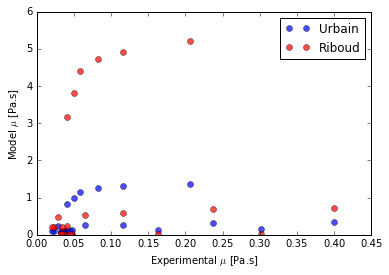

In [20]:
# create lists to contain the calculation results
measured = []
urbain = []
riboud = []

# calculate viscosities for the conditions in the data set
for index, row in ds1.data.iterrows():
    T = row['T']
    y = {'FeO': row['FeO'], 'P2O5': row['P2O5'], 'MnO': row['MnO'],
         'SiO2': row['SiO2']}
    measured.append(row['mu'])
    urbain.append(urbainTy(T=T, y=y))
    riboud.append(riboudTy(T=T, y=y))

# import matplotlib so that we can plot with it
import matplotlib.pyplot as plt
%matplotlib inline

# do the plot
plt.plot(measured, urbain, "bo", alpha = 0.7, label='Urbain')
plt.plot(measured, riboud, "ro", alpha = 0.7, label='Riboud')
plt.xlabel('Experimental $\mu$ [Pa.s]')
plt.ylabel('Model $\mu$ [Pa.s]')
plt.legend()
plt.show()